Internship Project: Model Hyperparameter Model


The cell below to import all the datasets that you will need during this assignment.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

The Iris dataset is loaded and split into training (80%) and testing (20%) sets with a fixed random state for reproducibility.

In [7]:
data = load_iris()
X, Y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


A basic XGBoost model is trained to establish a baseline for comparison.

In [10]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Evaluating the baseline model performance

In [12]:
Y_pred = model.predict(X_test)
baseline_metrics = {
    "Accuracy": accuracy_score(Y_test, Y_pred),
    "Precision": precision_score(Y_test, Y_pred, average='weighted'),
    "Recall": recall_score(Y_test, Y_pred, average='weighted'),
    "F1 Score": f1_score(Y_test, Y_pred, average='weighted')
}
print("Baseline Metrics:", baseline_metrics)

Baseline Metrics: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}


From the evaluation of the baseline model performance, all key evaluation metrics achieved a perfect score.

 An accuracy of 1.0 (or 100%) means the model correctly classified every instance in the test set.

 A recall of 1.0 means the model identified all instances of each class correctly without missing any positive cases.

A precision of 1.0 means the model did not have any false positives and only labeled an instance as positive when it truly belonged to that class.

 With both precision and recall at 1.0, the F1 score also reaches 1.0, showing the model's consistent performance in both identifying and correctly classifying instances.



Plotting Confusion Metrics

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


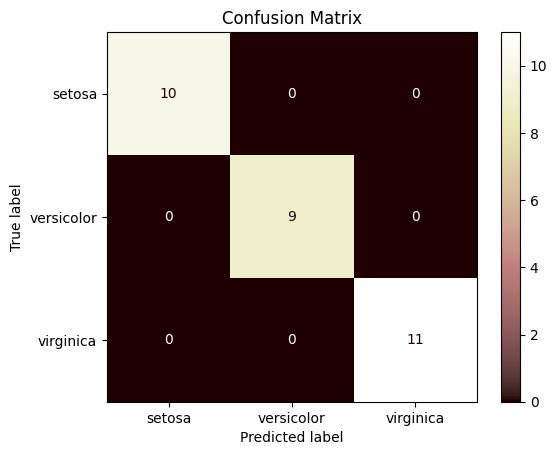

In [19]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='pink')
plt.title("Confusion Matrix")
plt.show()

Hyperparameter Tuning

Hyperparameter Tuning using Grid Search

GridSearchCV implements a "fit" and a "score" method. It also implements "score_samples", "predict", "predict_proba", "decision_function", "transform" and "inverse_transform" if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [20]:
from sklearn.model_selection import GridSearchCV

In [23]:


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, Y_train)
print("Best Parameters from Grid Search:", grid_search.best_params_)


Best Parameters from Grid Search: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


Hyperparameter Tuning using Bayesian Optimization 

In [25]:
import optuna
from sklearn.model_selection import cross_val_score


In [26]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    return cross_val_score(model, X_train, Y_train, cv=5, scoring='f1_weighted').mean()

Hyperparameter Tuning using Random Search

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [33]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted')
random_search.fit(X_train, y_train)
print("Best Parameters from Random Search:", random_search.best_params_)

Best Parameters from Random Search: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}


Evaluating the Hyperparameter Models

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [41]:
best_model = random_search.best_estimator_
Y_pred = best_model.predict(X_test)
print("The best hyperparameter model is:")
print(best_model)


The best hyperparameter model is:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


XGBoost is the best hyperparameter model. This is because it incoporates regularization techniques to prevent overfitting.

It is useful when dealing with noisy data or when the model complexity increases.

It is optimized for speed and performance, making it faster than other implementations of gradient boosting.

It has high scores in evaluation metrics like accuracy, precision, recall, and F1 score,

In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the metrics
print("Best Hyperparameters:", random_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Hyperparameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


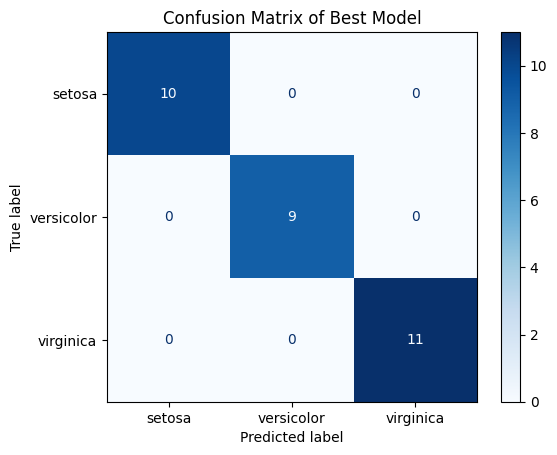

In [40]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of Best Model")
plt.show()